<a href="https://colab.research.google.com/github/iracheta827/InteligenciaArtificial/blob/main/IA_Eq5/PIA_IA_2daRN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Kevin Woge Rivera 1834672
###Benito Briones Bautista 1838682
###Jose Emanuel Martinez Rodriguez 1851368
###Gregorio Missael Iracheta Arias 1851846



In [ ]:
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt

In [ ]:
# Model configuration
batch_size = 50
img_width, img_height, img_num_channels = 32, 32, 3
loss_function = sparse_categorical_crossentropy
no_classes = 100
no_epochs = 50
optimizer = RMSprop(learning_rate=0.0001)
validation_split = 0.2
verbosity = 1

In [ ]:
# Load CIFAR-10 data
(input_train, target_train), (input_test, target_test) = cifar100.load_data("coarse")

169017344/169001437 [==============================] - 3s 0us/step


[15]
[[[255 255 255]
  [253 253 253]
  [253 253 253]
  ...
  [253 253 253]
  [253 253 253]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [253 253 253]
  [253 253 253]
  ...
  [253 253 253]
  [253 253 253]
  [255 255 255]]]


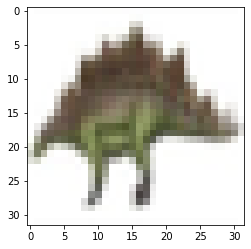

In [ ]:
plt.imshow(input_train[1])
print(target_train[1])
print(input_train[1])

In [ ]:
# Determine shape of the data
input_shape = (img_width, img_height, img_num_channels)

In [ ]:
# Parse numbers as floats
input_train = input_train.astype('float32')
input_test = input_test.astype('float32')

# Normalize data
input_train = input_train / 255
input_test = input_test / 255

In [ ]:
# Create the model
model = Sequential()
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(no_classes, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 30, 30, 128)       3584      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 15, 15, 128)      0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 13, 13, 128)       147584    
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 6, 6, 128)        0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 4, 4, 64)          73792     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 2, 2, 64)        

In [ ]:
# Compile the model
model.compile(loss=loss_function,
              optimizer=optimizer,
              metrics=['accuracy'])

# Fit data to model
history = model.fit(input_train, target_train,
            batch_size=batch_size,
            epochs=no_epochs,
            verbose=verbosity,
            validation_split=validation_split)

Epoch 1/70
800/800 [==============================] - 18s 22ms/step - loss: 2.8988 - accuracy: 0.1191 - val_loss: 2.6636 - val_accuracy: 0.1689
Epoch 2/70
800/800 [==============================] - 13s 17ms/step - loss: 2.5680 - accuracy: 0.2092 - val_loss: 2.5016 - val_accuracy: 0.2404
Epoch 3/70
800/800 [==============================] - 14s 17ms/step - loss: 2.4086 - accuracy: 0.2608 - val_loss: 2.3660 - val_accuracy: 0.2706
Epoch 4/70
800/800 [==============================] - 14s 17ms/step - loss: 2.3071 - accuracy: 0.2925 - val_loss: 2.2606 - val_accuracy: 0.3007
Epoch 5/70
800/800 [==============================] - 13s 17ms/step - loss: 2.2357 - accuracy: 0.3092 - val_loss: 2.2065 - val_accuracy: 0.3189
Epoch 6/70
800/800 [==============================] - 14s 18ms/step - loss: 2.1715 - accuracy: 0.3284 - val_loss: 2.2052 - val_accuracy: 0.3140
Epoch 7/70
800/800 [==============================] - 14s 17ms/step - loss: 2.1155 - accuracy: 0.3450 - val_loss: 2.1077 - val_accuracy:

Test loss: 2.1093993186950684 / Test accuracy: 0.4830999970436096


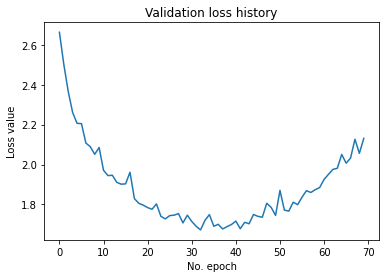

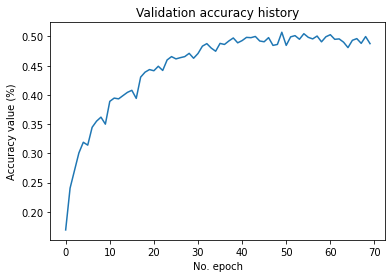

In [ ]:
# Generate generalization metrics
score = model.evaluate(input_test, target_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

# Visualize history
# Plot history: Loss
plt.plot(history.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Plot history: Accuracy
plt.plot(history.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

<Figure size 432x288 with 0 Axes>

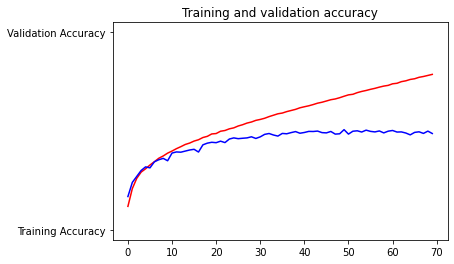

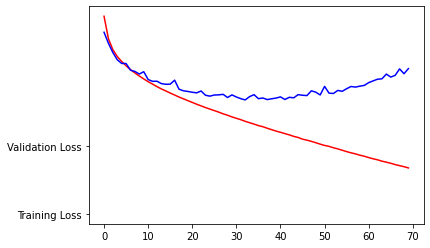

<Figure size 432x288 with 0 Axes>

In [ ]:
%matplotlib inline
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
 
epochs=range(len(acc)) # Get number of epochs
 
#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()
 
#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.figure()